## 微分フィルタ
急激な輝度の変化が起こっている部分のエッジを取り出すフィルタで、隣り合う画素同士の差を取る

(128, 128, 1)
(128, 128)


True

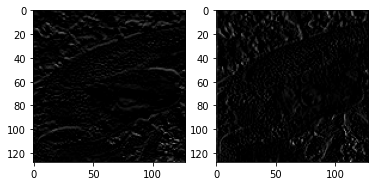

In [23]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

def BGR2GRAY(img, K_size=3):
   
    # グレースケール化
    out = 0.2126*img[:,:,0].copy() + 0.7152*img[:,:,1].copy() + 0.0722*img[:,:,2].copy()
    out = out.astype(np.uint8)
    
    return out 

def different_filter(img, K_size):
    if len(img.shape)==3:
        H, W, C = img.shape
    else :
        img = np.expand_dims(img, axis=-1)
        H, W, C = img.shape
        
    # zero padding
    pad = K_size//2
    out = np.zeros((H+pad*2, W+pad*2, C), dtype=np.float)
    out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
    tmp = out.copy()
    
    out_v = out.copy()
    out_h = out.copy()
    
    # vertical kernel
    Kv = [[0.,-1, 0], [0, 1, 0], [0, 0 ,0]]
    # horizontal kernel
    Kh = [[0, 0, 0], [-1, 1, 0], [0, 0, 0]]
    
    # filtering
    for y in range(H):
        for  x in range(W):
            for c in range(C):
                out_v[y, x, c] = np.sum(Kv*tmp[y:y+K_size, x:x+K_size, c])
                out_h[y, x, c] = np.sum(Kh*tmp[y:y+K_size, x:x+K_size, c])
    
    out_v = out_v[:H, :W,:]
    out_h = out_h[:H, :W,:]
    
    out_v = np.clip(out_v, 0, 255)
    out_h = np.clip(out_h, 0, 255)
    
    out_v = out_v.astype(np.uint8)
    out_h = out_h.astype(np.uint8)
    
    return out_v, out_h


img = cv2.imread('../imori.jpg')

#print(img.shape)
#plt.imshow(img)
gray = BGR2GRAY(img, K_size=3)
#print(gray.shape)
plt.imshow(gray)
out_v, out_h = different_filter(gray, K_size=3)

print(out_v.shape)
#shapeが　(128, 128, 1)　だとplt.imshowが上手くいかないので、１の次元を削除
out_v = np.squeeze(out_v)
out_h = np.squeeze(out_h)
print(out_v.shape)

plt.subplot(1, 2, 1)
plt.imshow(out_v, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(out_h, cmap='gray')

cv2.imwrite('out_v14.jpg', out_v)
cv2.imwrite('out_h14.jpg', out_h)